# TP 2 ALC 

# Contenido nutricional de la Canasta Basica

## Integrantes:
- Camila Prieto
- Ignacio Gallardo

## Dependencias

In [1]:
# Instalacion de paquetes faltantes
#!pip install scipy
#!pip install pandas --upgrade
#!pip install seaborn --upgrade
#!pip install scikit-learn
#!pip install matplotlib --upgrade

In [2]:
from funciones import *

### Consigna 1

Esta funcion devuelve la tabla nutricional con los 0 completados, renombramiento y recalculo de Na, Ca y Fe que estaban en miligramos. Tambien sacamos los acentos y dejamos los nombres en mayuscula para normalizar la tabla

In [3]:
tabla_nutricional().head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Verdura/Fruta
0,LECHE FLUIDA ENTERA,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0,0
1,LECHE ENTERA EN POLVO,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0,0
2,YOGURT,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0,0
3,QUESO CREMA,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0,0
4,QUESO CUARTIROLO,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0,0


### Consigna 2

Realizamos la funciona que comprueba la dieta segun los estandares de la OMS. Como comenta la tesis de Cappay Maria, nuestra tabla nutricional no alcanza los estandares impuestos, la funcion devuelve el valor de verdad que nos piden y dice que elementos son los que causan que sea falso

In [4]:
chequeoDieta(tabla_nutricional())

Los Hidratos de Carbono no cumplen los estandares de la OMS
Las Grasas no cumplen los estandares de la OMS
La Fibra no cumple los estandares de la OMS


False

### Consigna 3

Primero preparamos la tabla nutricional para que este toda en base a 1gr de su alimento base

In [5]:
tabla = tabla_nutricional()

tabla = tabla.drop(columns=["Verdura/Fruta"])

tabla.iloc[:, 2:] = tabla.iloc[:, 2:].div(tabla['Cantidad (gr/ml)'], axis=0)

tabla = tabla.drop(columns=["Alimento","Cantidad (gr/ml)"])

tabla.head()

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,0.046000,0.031000,0.029000,0.000570,0.001050,7.000000e-07,0.0,0.018481,0.008111,0.001926,0.0
1,0.410000,0.258182,0.248182,0.004040,0.009000,5.454545e-06,0.0,0.147273,0.070000,0.005455,0.0
2,0.128947,0.026842,0.025789,0.000421,0.000930,2.631579e-07,0.0,0.016842,0.007368,0.000737,0.0
3,0.036145,0.060241,0.222892,0.000741,0.000560,0.000000e+00,0.0,0.216867,0.066265,0.006024,0.0
4,0.016393,0.210383,0.218579,0.005694,0.004519,0.000000e+00,0.0,0.207650,0.057377,0.005464,0.0


Calculamos la matriz con escalado estandar (Tabla Estrella)

In [6]:
tabla_estrella = tabla - tabla.mean()

tabla_estrella.head()

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,-0.141722,-0.041134,-0.073702,-0.012232,0.000359,-0.000011,-0.07063,-0.023724,-0.022930,-0.029649,-0.007621
1,0.222278,0.186048,0.145479,-0.008762,0.008309,-0.000006,-0.07063,0.105067,0.038959,-0.026120,-0.007621
2,-0.058775,-0.045292,-0.076913,-0.012382,0.000239,-0.000011,-0.07063,-0.025364,-0.023672,-0.030838,-0.007621
3,-0.151577,-0.011893,0.120189,-0.012061,-0.000130,-0.000011,-0.07063,0.174662,0.035224,-0.025550,-0.007621
4,-0.171329,0.138249,0.115877,-0.007108,0.003829,-0.000011,-0.07063,0.165444,0.026336,-0.026110,-0.007621


Con esta nueva tabla ahora podemos calcula la matriz de covarianza

In [7]:
covarianza = (tabla_estrella.transpose() @ tabla_estrella)/len(tabla_estrella)

covarianza

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
HC (gr),7.712939e-02,-2.807587e-04,-1.211085e-02,-1.551012e-03,1.181821e-05,6.001139e-07,4.044257e-02,-4.924729e-03,-3.097968e-03,-5.099179e-03,1.104142e-03
Proteinas (gr),-2.807587e-04,7.422239e-03,1.998140e-04,-6.388112e-07,7.958394e-05,6.568193e-07,-3.155509e-03,1.821622e-03,5.953635e-04,-1.759198e-03,-1.890942e-04
Grasas (gr),-1.211085e-02,1.998140e-04,4.862791e-02,-6.858051e-04,7.066464e-05,-5.252520e-07,-5.215232e-03,1.349103e-02,1.212881e-02,2.205015e-02,-6.869077e-04
Na (gr),-1.551012e-03,-6.388112e-07,-6.858051e-04,3.665155e-03,-2.762780e-06,-4.505414e-08,-8.487049e-04,-3.080117e-04,-2.502751e-04,-2.386549e-04,-9.353908e-05
Ca (gr),1.181821e-05,7.958394e-05,7.066464e-05,-2.762780e-06,3.147284e-06,-4.327654e-09,-5.708222e-06,6.696622e-05,1.839944e-05,-1.352182e-05,-3.153673e-06
Fe (gr),6.001139e-07,6.568193e-07,-5.252520e-07,-4.505414e-08,-4.327654e-09,2.554781e-10,-3.713413e-07,-1.961262e-07,-5.558786e-08,-2.440272e-07,1.670945e-08
Azucares Libres (gr),4.044257e-02,-3.155509e-03,-5.215232e-03,-8.487049e-04,-5.708222e-06,-3.713413e-07,4.840577e-02,-2.158981e-03,-1.280549e-03,-2.106708e-03,-3.286463e-04
AGS (gr),-4.924729e-03,1.821622e-03,1.349103e-02,-3.080117e-04,6.696622e-05,-1.961262e-07,-2.158981e-03,7.186318e-03,3.924956e-03,2.655723e-03,-3.024027e-04
AGNI (gr),-3.097968e-03,5.953635e-04,1.212881e-02,-2.502751e-04,1.839944e-05,-5.558786e-08,-1.280549e-03,3.924956e-03,3.559516e-03,4.678748e-03,-1.962697e-04
AG p (gr),-5.099179e-03,-1.759198e-03,2.205015e-02,-2.386549e-04,-1.352182e-05,-2.440272e-07,-2.106708e-03,2.655723e-03,4.678748e-03,1.419118e-02,-2.187988e-04


Calculamos los autovectores y autovalores de la matriz de Covarianza

In [8]:
gamma, U = np.linalg.eigh(covarianza)
U = np.flip(U, 1)


#print("Autovalores: ", gamma)

#for i in range(0, len(U)):
#    print("Autovector ", i, ": ", U[:,i])

Ahora con los autovalores, podemos ver la varianza de cada autovector y elegir una cantidad que no nos pierda la menor cantidad de informacion

In [9]:
for i in range(0, len(gamma)):
    print("Variabilidad de Autovector", i, ": ", 100*gamma[i]/sum(gamma), "%")

Variabilidad de Autovector 0 :  6.077363654190174e-08 %
Variabilidad de Autovector 1 :  0.0008009627523298245 %
Variabilidad de Autovector 2 :  0.023295414608125644 %
Variabilidad de Autovector 3 :  0.07822140829391593 %
Variabilidad de Autovector 4 :  0.23227438309952098 %
Variabilidad de Autovector 5 :  1.7089349426558178 %
Variabilidad de Autovector 6 :  2.1719890366249706 %
Variabilidad de Autovector 7 :  4.624472662617957 %
Variabilidad de Autovector 8 :  9.556302683201647 %
Variabilidad de Autovector 9 :  28.87971788194277 %
Variabilidad de Autovector 10 :  52.72399056342932 %


Como podemos ver, con los ultimos 3 autovectores, podemos representar un 90% de los datos originalaes, asi que vamos a usar esa cantidad. Ahora si podemos calcular la tabla final y agregar de nuevo los nombre de los alimentos

In [10]:
autovectores = U[:,len(U)-3:len(U)]

tabla_final =  tabla_estrella @ autovectores

tabla_final = tabla_final.rename(columns={0:"Z1", 1:"Z2", 2:"Z3"})

tabla_final["Alimento"] = tabla_nutricional()["Alimento"]

tabla_final.head()

,Z1,Z2,Z3,Alimento
0,0.008446,-0.000939,0.000002,LECHE FLUIDA ENTERA
1,0.008418,-0.005447,-0.000004,LECHE ENTERA EN POLVO
2,0.011246,-0.000867,0.000004,YOGURT
3,0.003557,0.001559,0.000004,QUESO CREMA
4,-0.002795,-0.000823,0.000007,QUESO CUARTIROLO


Veamos los graficos de cada uno de las convinaciones de columnas para sacar conclusiones

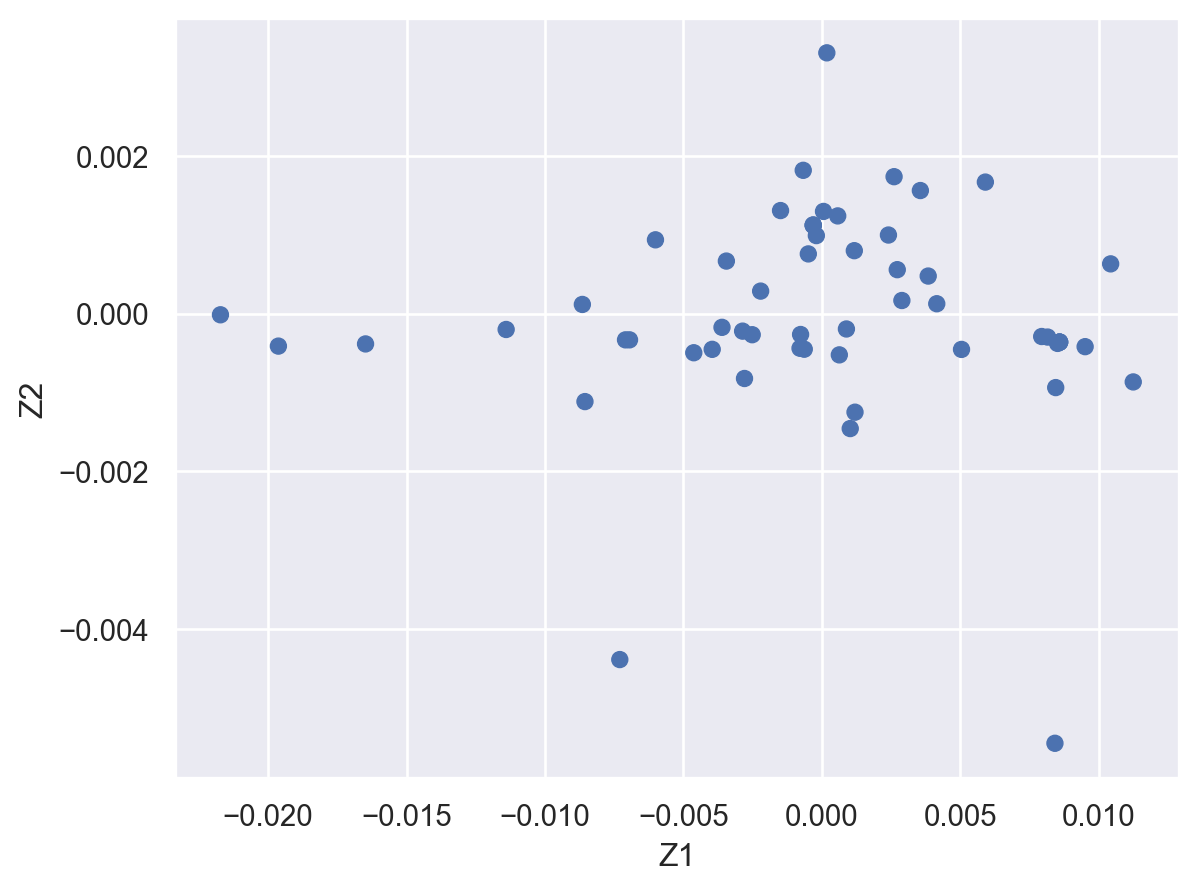

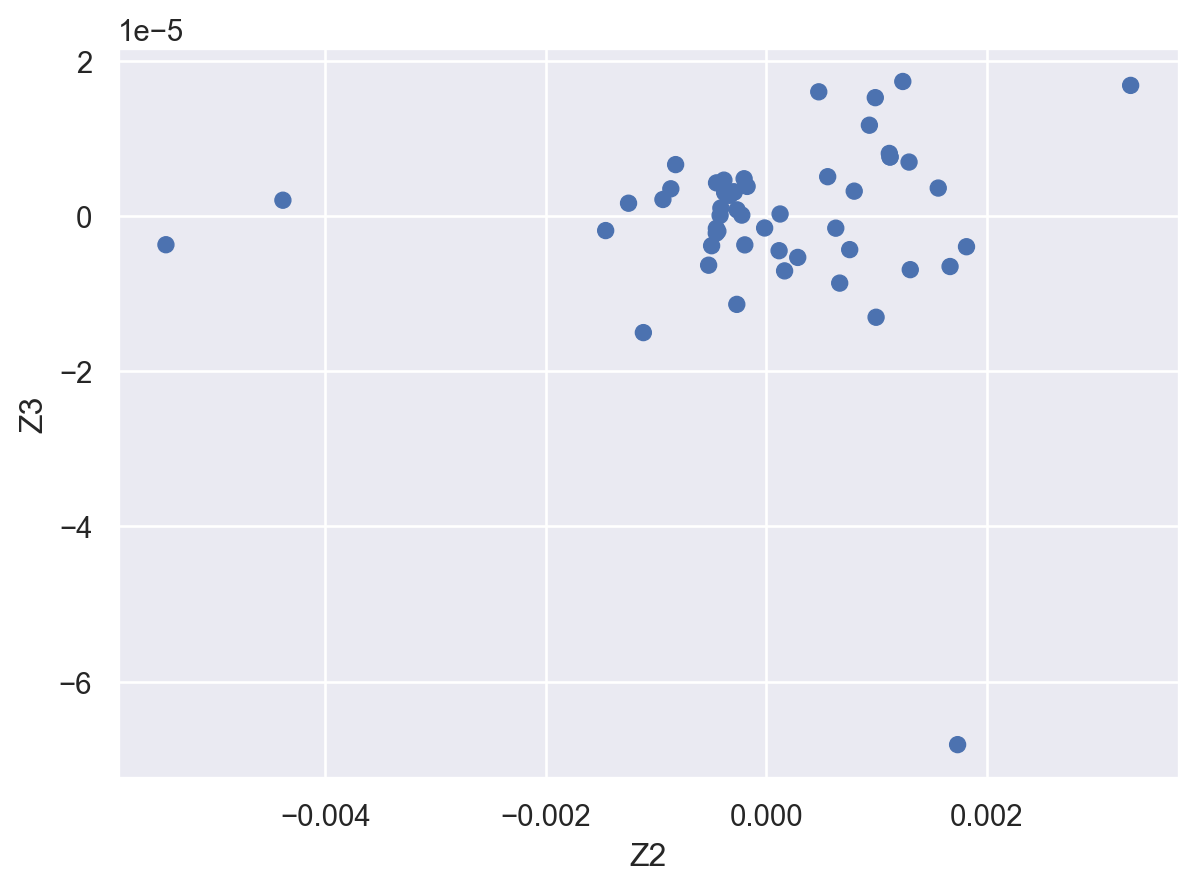

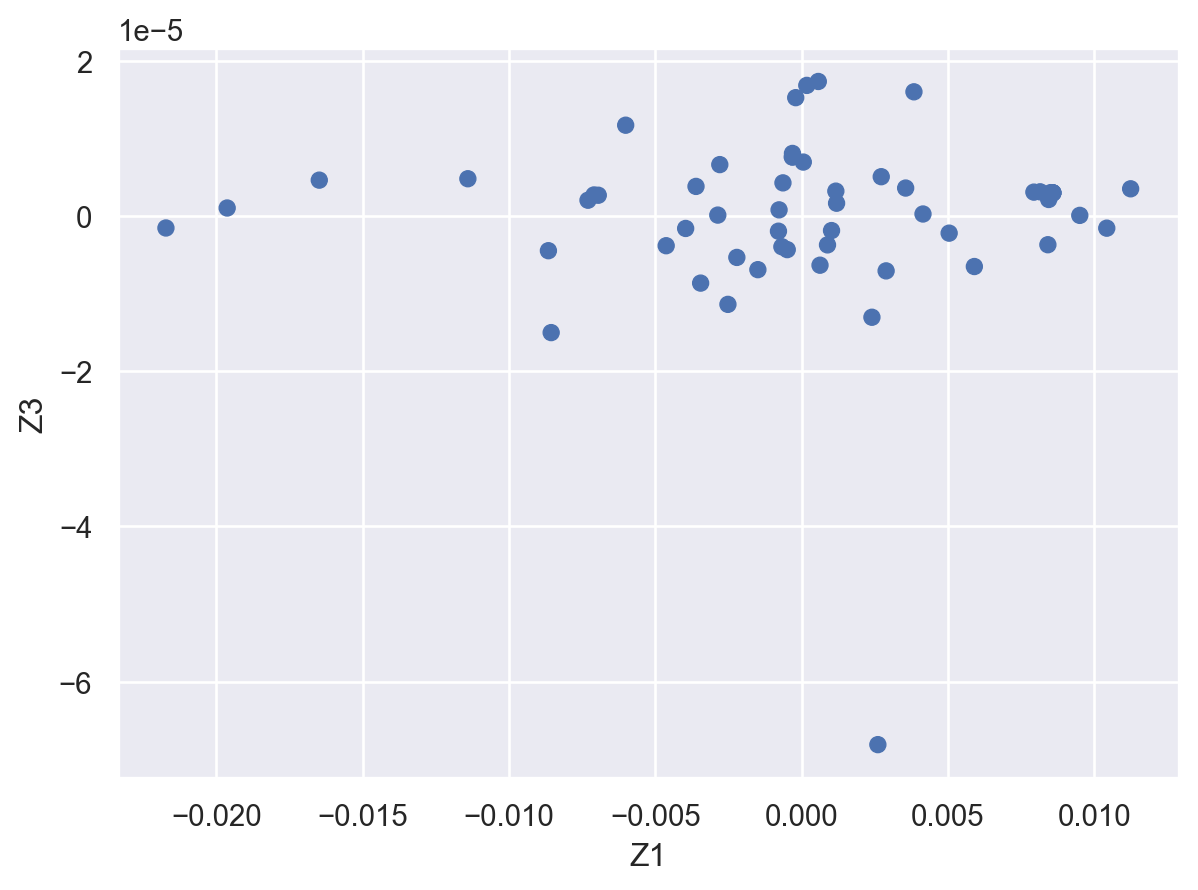

In [11]:
graficosPCA(tabla_final)

Tambien hicimos un grafico en 3D para ver la relacion de estas 3 columnas juntas

<Axes3D: >

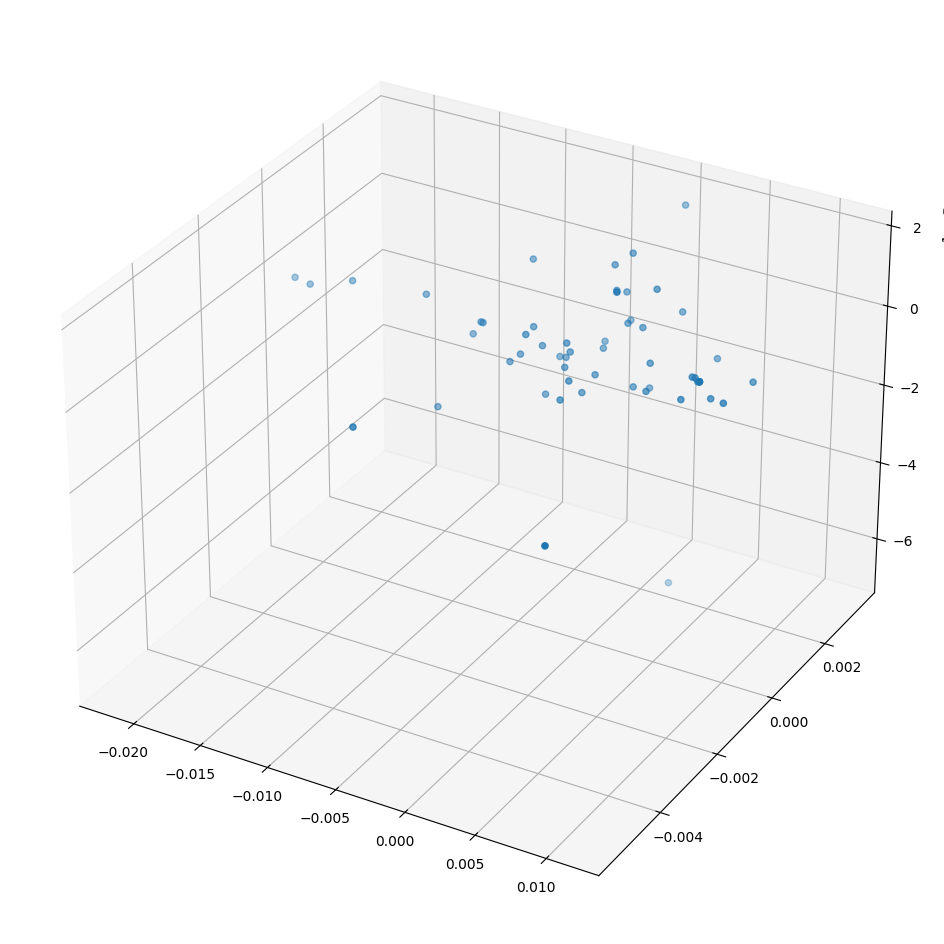

In [12]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(tabla_final["Z1"],tabla_final["Z2"],tabla_final["Z3"])

ax

### Consigna 4

Antes de juntar la anterior tabla con consumidores. Vamos a escalar la tabla de consumidores libres para que todos los alimentos esten en gramos

In [13]:
consumidores = tabla_consumidores()

consumidores.head()


,PRODUCTOS,Cantidad (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0


In [14]:
consumidores = consumidores.drop(columns=["Cantidad (gr)"])

consumidores.head()

,PRODUCTOS,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,950.0,1250.0,1350.0,1500.0,1690.0


In [15]:
consumidores.iloc[:,1:] = consumidores.iloc[:,1:].div(tabla_consumidores()['Cantidad (gr)'], axis=0)

consumidores = consumidores.rename(columns={"PRODUCTOS":"Alimento"})

consumidores.head()

,Alimento,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1.666667,2.066667,2.30,2.4,2.466667
1,ARROZ GRANO FINO,1.650000,2.300000,2.80,3.1,3.550000
2,AZUCAR LEDESMA,1.990000,2.050000,2.05,2.1,2.100000
3,FIDEOS GUISEROS,3.200000,3.980000,4.30,4.4,4.580000
4,HARINA DE TRIGO,0.950000,1.250000,1.35,1.5,1.690000


Ahora que ya tengo escalado consumidores, ahora tengo que juntar los nalimentos que estan en ambos, para esto hicimos una funcion que edita los nombres de alimentos para que coincidan y se pueda hacer el merge de estas dos tablas

In [16]:
tabla_final = tabla_final.map(arreglo_observacional)

consumidores = consumidores.map(arreglo_observacional)

tabla_mergeada = pd.merge(tabla_final, consumidores, on="Alimento")

tabla_mergeada.head()

,Z1,Z2,Z3,Alimento,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,0.008446,-0.000939,0.000002,LECHE,1.100000,1.210000,1.620000,1.890000,1.990000
1,0.002889,0.000165,-0.000007,HUEVO,3.055556,3.611111,4.166667,4.722222,5.277778
2,0.000059,0.001294,0.000007,ASADO,5.400000,6.300000,7.500000,7.600000,7.750000
3,-0.000314,0.001122,0.000008,PALETA,5.200000,6.200000,7.100000,7.800000,7.900000
4,-0.000311,0.001115,0.000008,CARNE PICADA,4.200000,4.800000,5.200000,5.200000,5.500000


### Consigna 5

Para hacer este punto, primero vamos a tomar la tabla donde los alimentos ya estan escalados a 1 gramo y vamos a volver a agregarle alimento. Una vez hecho esto, vamos a volver a aplicar el arreglo observacional y eliminar los columnas que no queremos analizar

In [17]:
tabla["Alimento"] = tabla_nutricional()["Alimento"]

tabla = tabla.map(arreglo_observacional)

tabla = tabla.drop(columns=["Na (gr)","Ca (gr)","Fe (gr)","Azucares Libres (gr)","AGS (gr)","AGNI (gr)","AG p (gr)","Fibra (gr)"])

tabla.head()

,HC (gr),Proteinas (gr),Grasas (gr),Alimento
0,0.046000,0.031000,0.029000,LECHE
1,0.410000,0.258182,0.248182,LECHE ENTERA EN POLVO
2,0.128947,0.026842,0.025789,YOGURT
3,0.036145,0.060241,0.222892,QUESO CREMA
4,0.016393,0.210383,0.218579,QUESO CUARTIROLO


In [18]:
consumidores.head()

,Alimento,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE,1.666667,2.066667,2.30,2.4,2.466667
1,ARROZ,1.650000,2.300000,2.80,3.1,3.550000
2,AZUCAR,1.990000,2.050000,2.05,2.1,2.100000
3,FIDEOS,3.200000,3.980000,4.30,4.4,4.580000
4,HARINA DE TRIGO,0.950000,1.250000,1.35,1.5,1.690000


Ahora si que tenemos nuestro consumidores y la tabla nutricional. Vamos a hacerles el merge

In [19]:
consumidores_nutricional = pd.merge(consumidores,tabla, on='Alimento')

consumidores_nutricional.head()

,Alimento,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,HC (gr),Proteinas (gr),Grasas (gr)
0,ACEITE,1.666667,2.066667,2.30,2.4,2.466667,0.000000,0.000000,1.000000
1,ARROZ,1.650000,2.300000,2.80,3.1,3.550000,0.791944,0.068889,0.000000
2,AZUCAR,1.990000,2.050000,2.05,2.1,2.100000,1.000000,0.000000,0.000000
3,FIDEOS,3.200000,3.980000,4.30,4.4,4.580000,0.725893,0.127679,0.015714
4,HARINA DE TRIGO,0.950000,1.250000,1.35,1.5,1.690000,0.687111,0.102889,0.026889


Ahora preparamos esta tabla para que podamos realizar los graficos

In [20]:
consumidores_nutricional = consumidores_nutricional.melt(id_vars=["Alimento","HC (gr)","Proteinas (gr)","Grasas (gr)"],var_name='Fecha',value_name='Precio por gr ($)')

consumidores_nutricional.head()

,Alimento,HC (gr),Proteinas (gr),Grasas (gr),Fecha,Precio por gr ($)
0,ACEITE,0.000000,0.000000,1.000000,31/12/2023,1.666667
1,ARROZ,0.791944,0.068889,0.000000,31/12/2023,1.650000
2,AZUCAR,1.000000,0.000000,0.000000,31/12/2023,1.990000
3,FIDEOS,0.725893,0.127679,0.015714,31/12/2023,3.200000
4,HARINA DE TRIGO,0.687111,0.102889,0.026889,31/12/2023,0.950000


Ahora con esta funcion, podemos graficar su procio y ver la recta por minimos cuadrados para ver como esta aumento el precio por gramo de alimento, Hidratos de Carbono, Grasas y Proteinas. Si el alimento no tiene del nutriente a analizar, no va a estar mostrado en el grafico

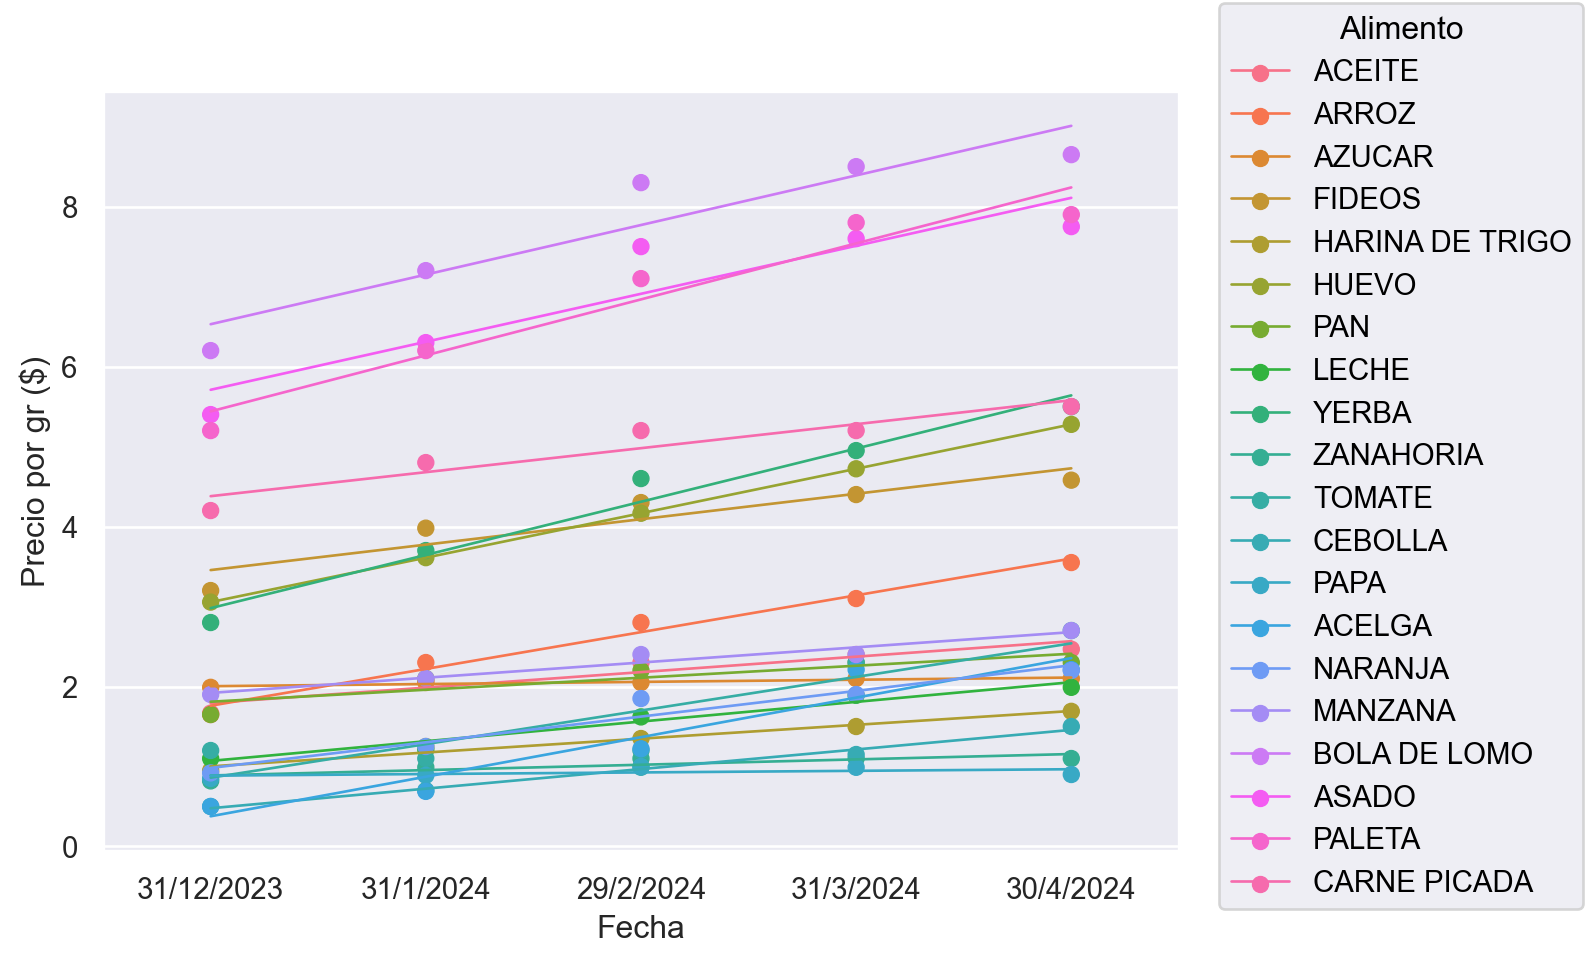

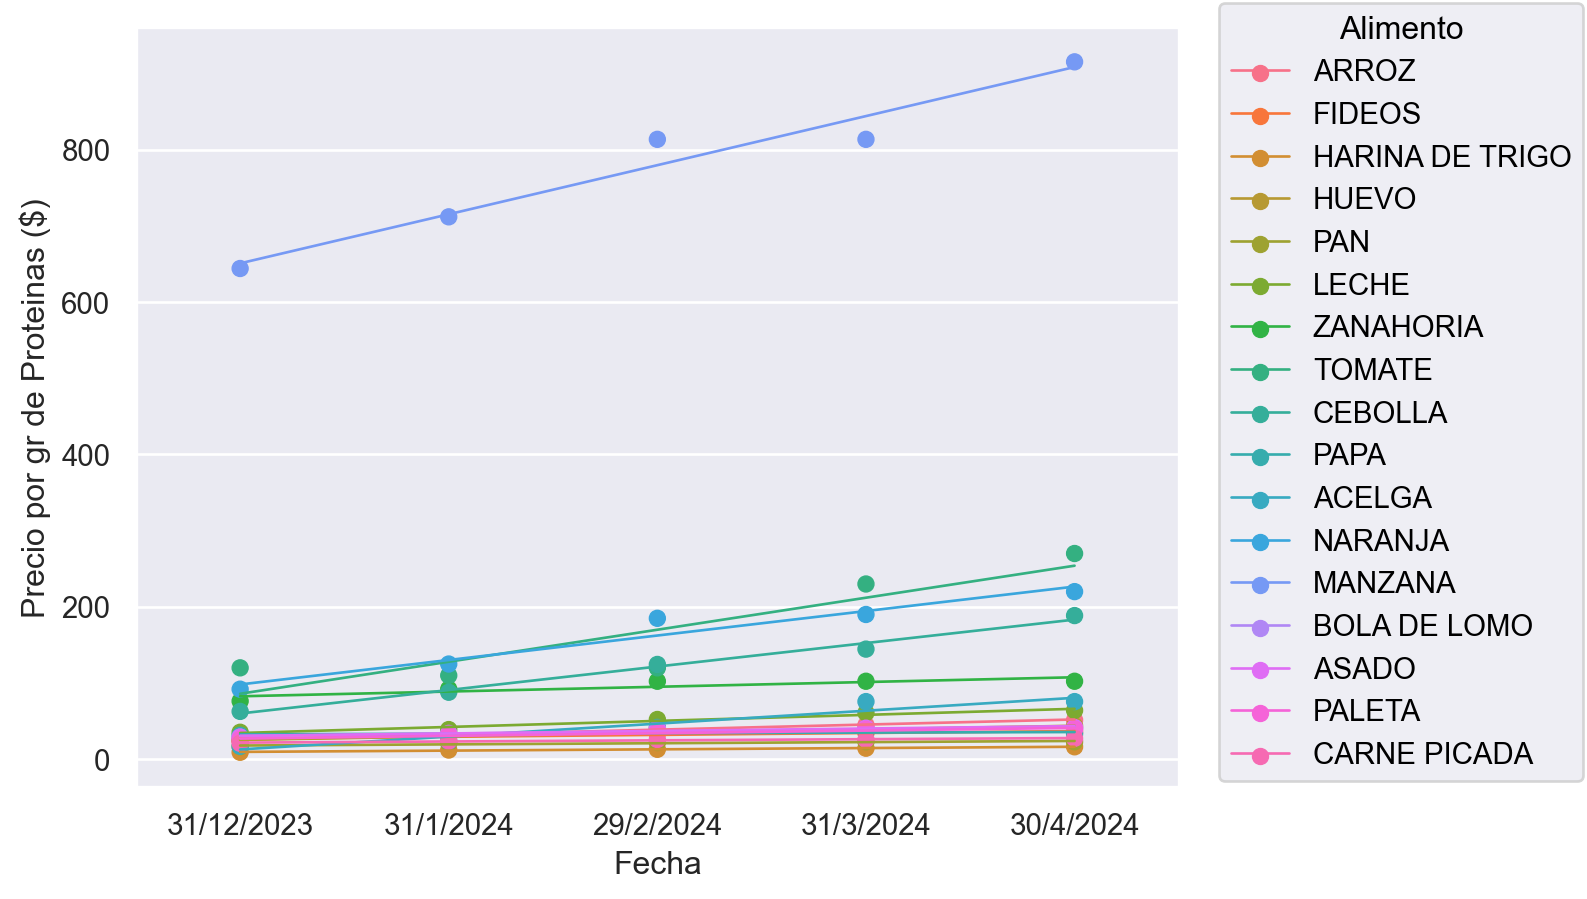

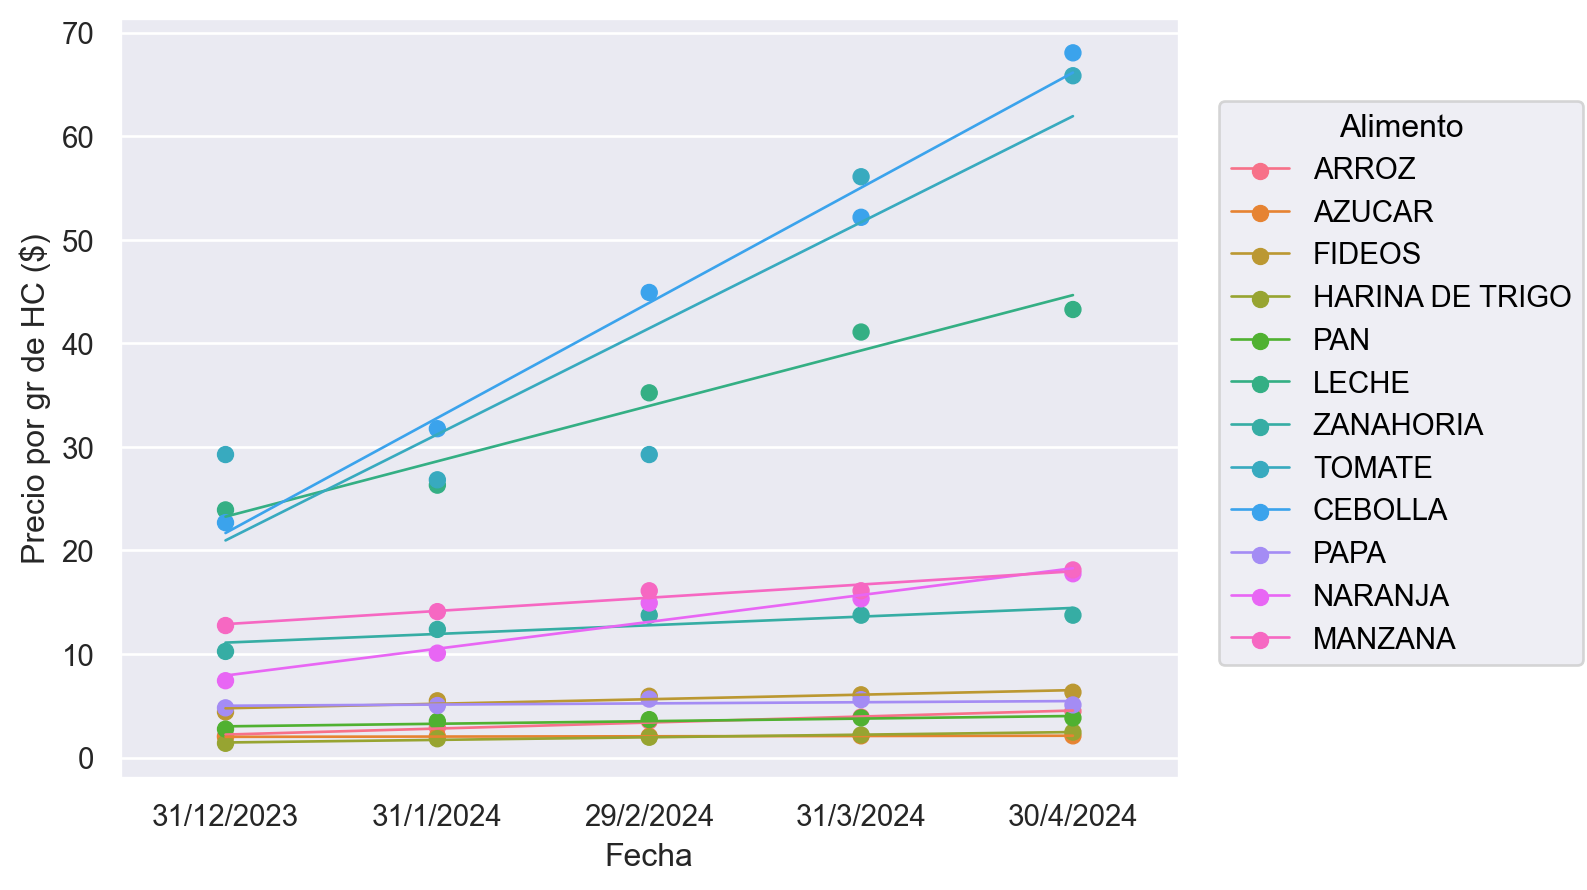

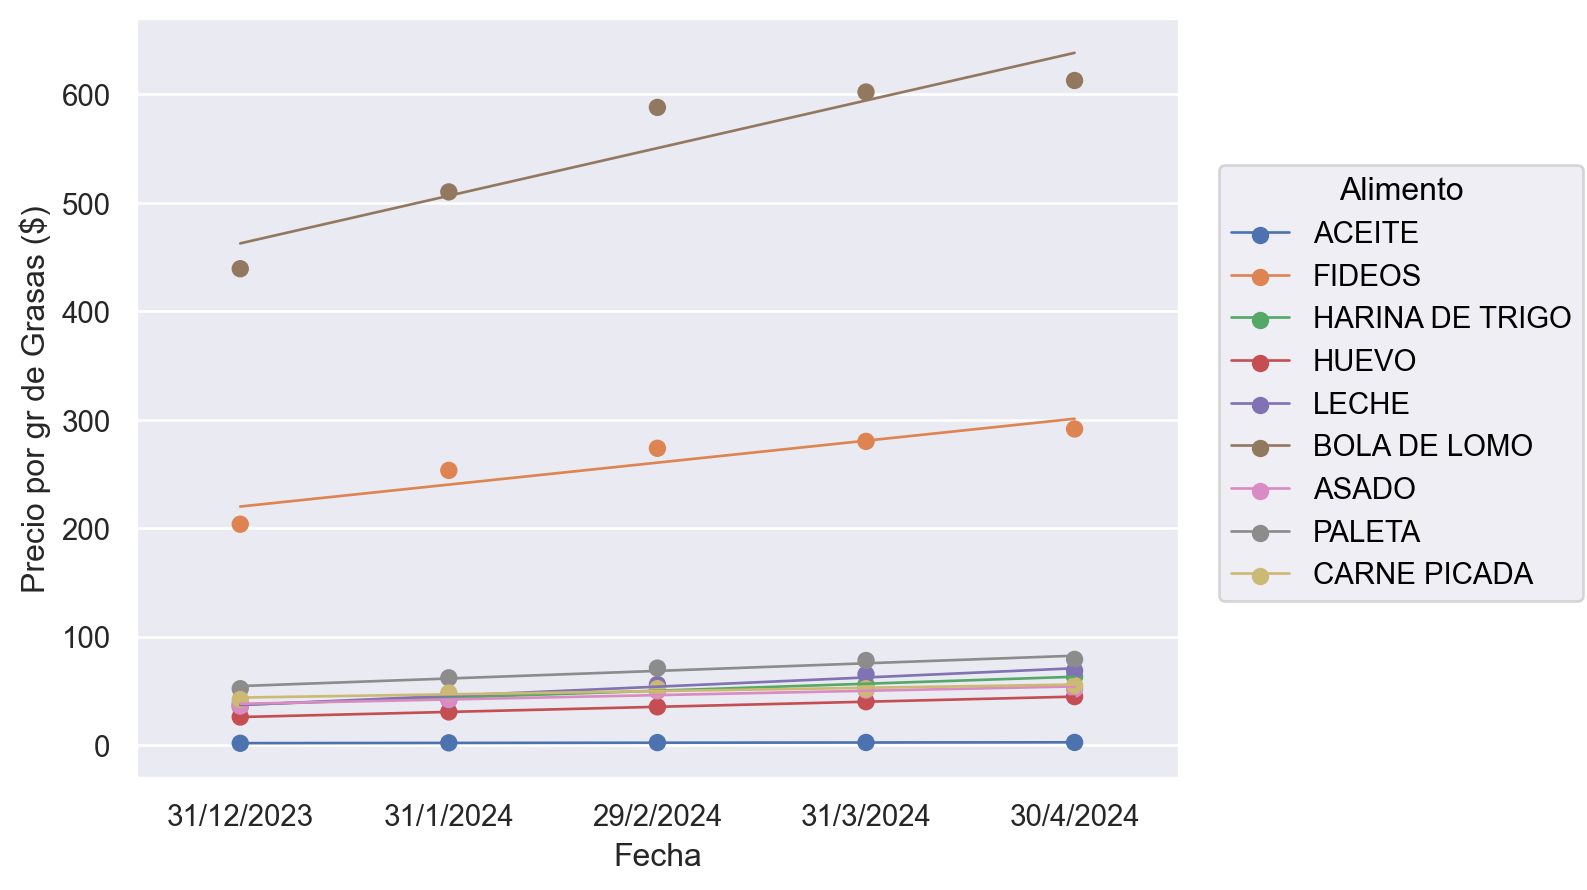

In [21]:
graficosNutricionales(consumidores_nutricional)

### Consigna 6

Primero vamos a preparar cada uno de nuestros dataframes que corresponderian a solo carne, solo verdura y despues los alimenots de almacen y graficamos su aumento de precios por gramo y segun gramo macronutrientes

In [22]:
carne_nutricional = consumidores_nutricional[consumidores_nutricional["Alimento"].isin(["CARNE PICADA", "BOLA DE LOMO", "ASADO", "PALETA"])].reset_index(drop=True)

carne_nutricional.head()

,Alimento,HC (gr),Proteinas (gr),Grasas (gr),Fecha,Precio por gr ($)
0,BOLA DE LOMO,0.0,0.212059,0.014118,31/12/2023,6.2
1,ASADO,0.0,0.186000,0.150000,31/12/2023,5.4
2,PALETA,0.0,0.200000,0.100000,31/12/2023,5.2
3,CARNE PICADA,0.0,0.200000,0.100000,31/12/2023,4.2
4,BOLA DE LOMO,0.0,0.212059,0.014118,31/1/2024,7.2


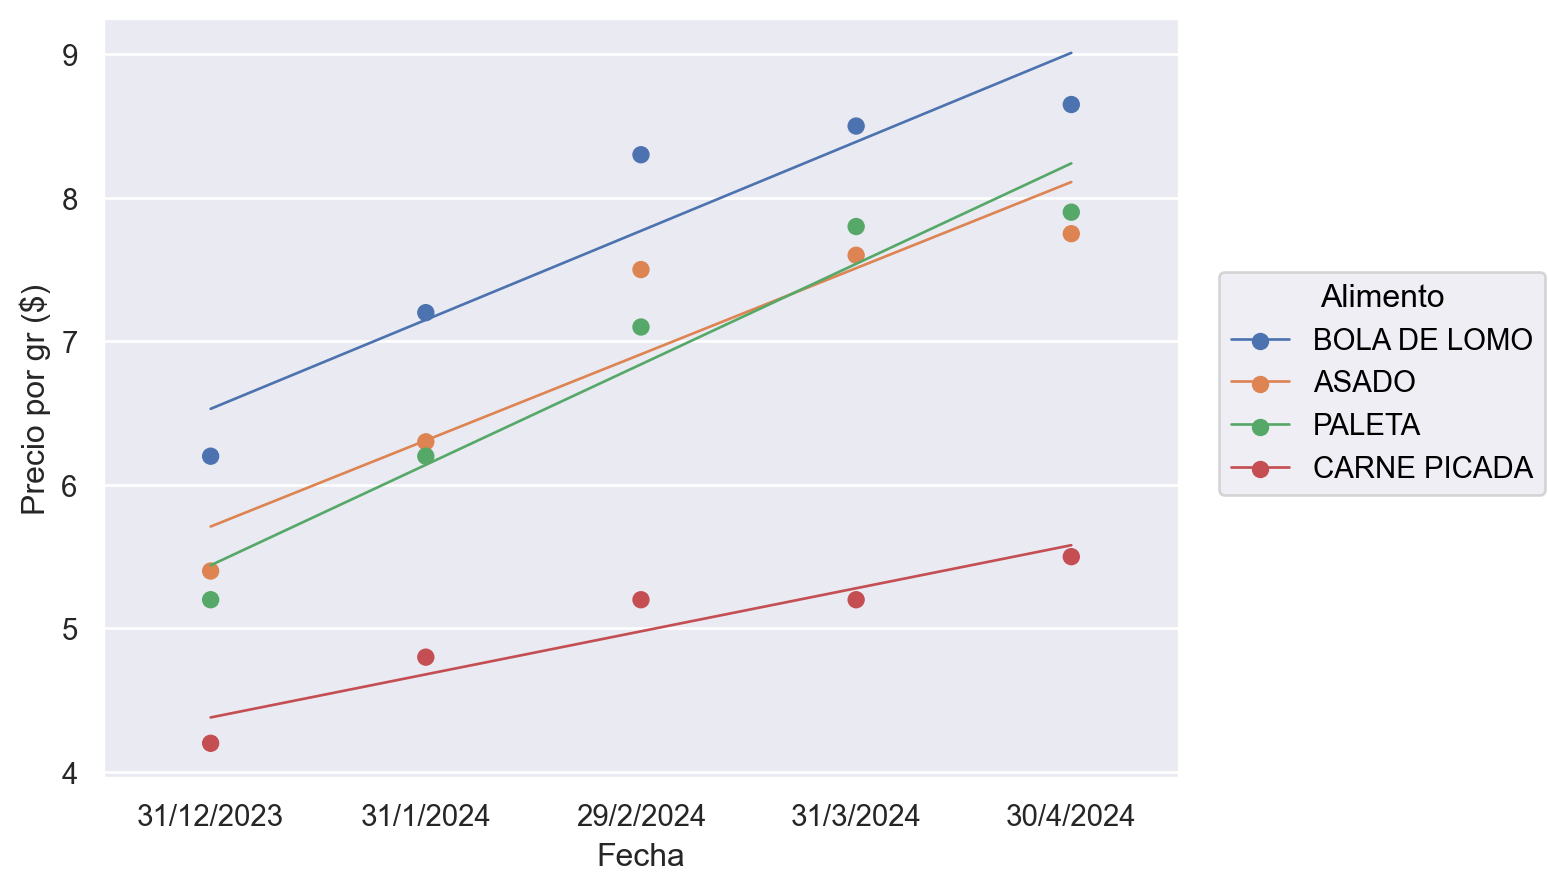

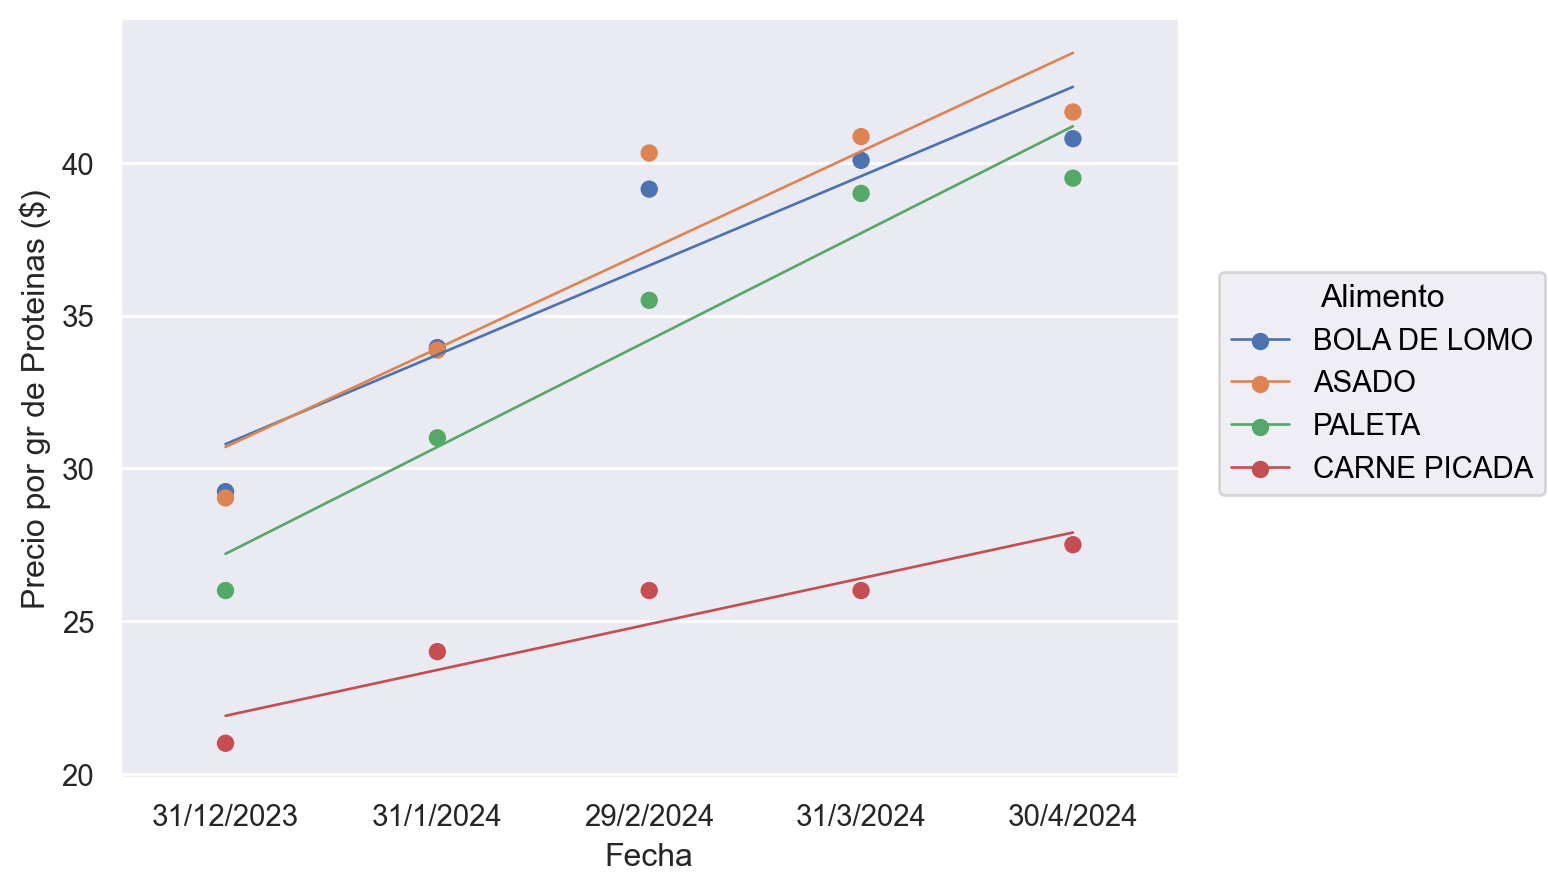

Los Alimentos seleccionados no tienen Hidratos de Carbono (HC)


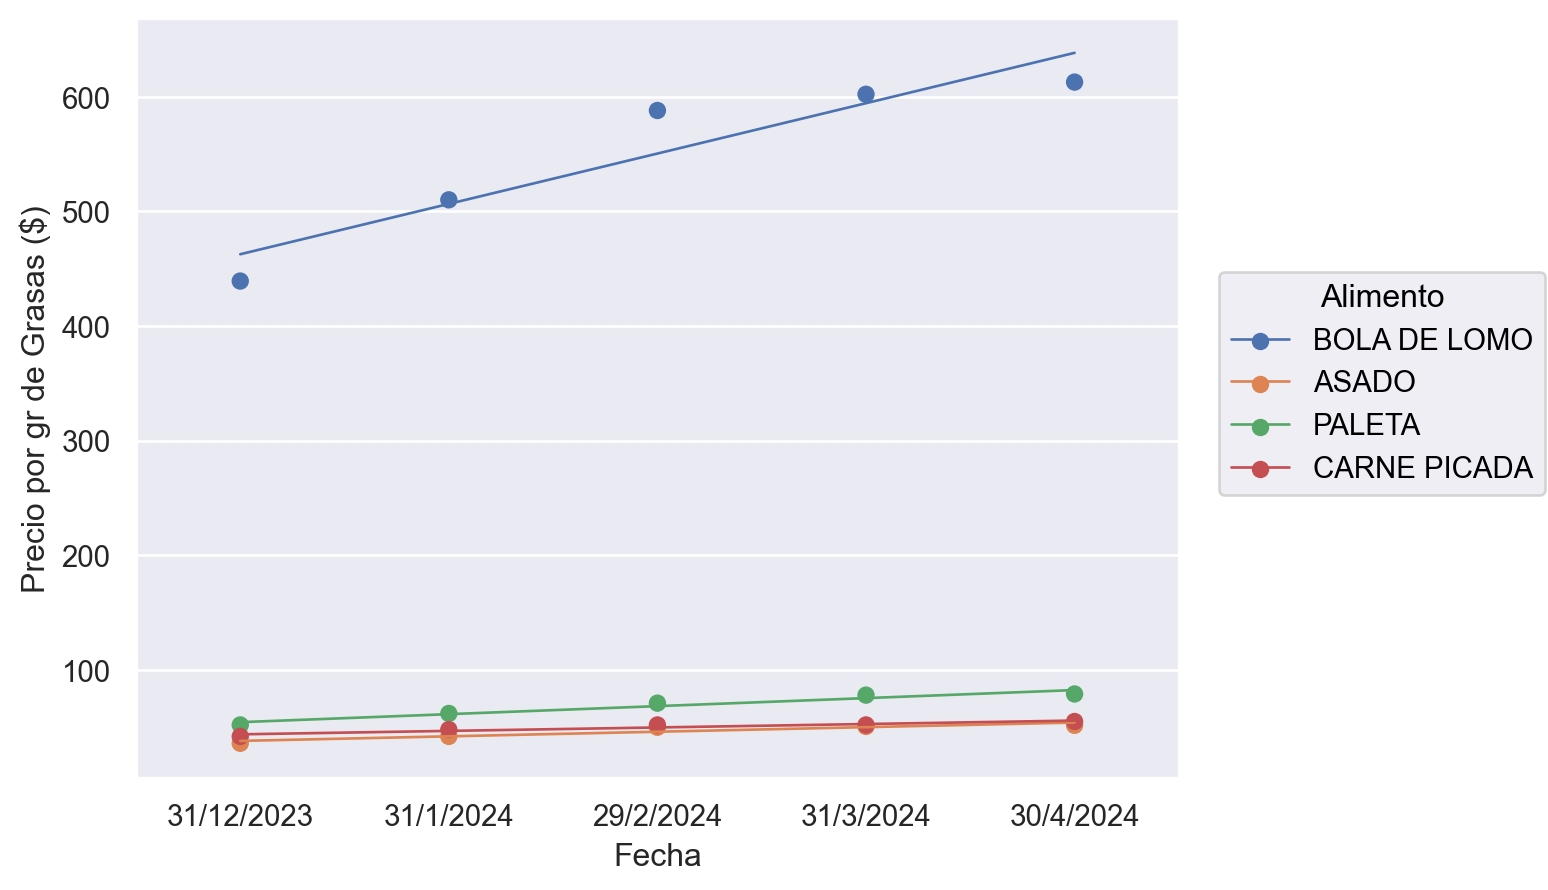

In [23]:
graficosNutricionales(carne_nutricional)

In [24]:
VF_nutricional = consumidores_nutricional[consumidores_nutricional["Alimento"].isin(["TOMATE", "PAPA", "ACELGA", "ZANAHORIA","MANZANA" ,"NARANJA", "CEBOLLA"])].reset_index(drop=True)

VF_nutricional.head()

,Alimento,HC (gr),Proteinas (gr),Grasas (gr),Fecha,Precio por gr ($)
0,ZANAHORIA,0.080000,0.010741,0.0,31/12/2023,0.82
1,TOMATE,0.041014,0.010000,0.0,31/12/2023,1.20
2,CEBOLLA,0.022045,0.007955,0.0,31/12/2023,0.50
3,PAPA,0.176987,0.026987,0.0,31/12/2023,0.85
4,ACELGA,0.000000,0.029200,0.0,31/12/2023,0.50


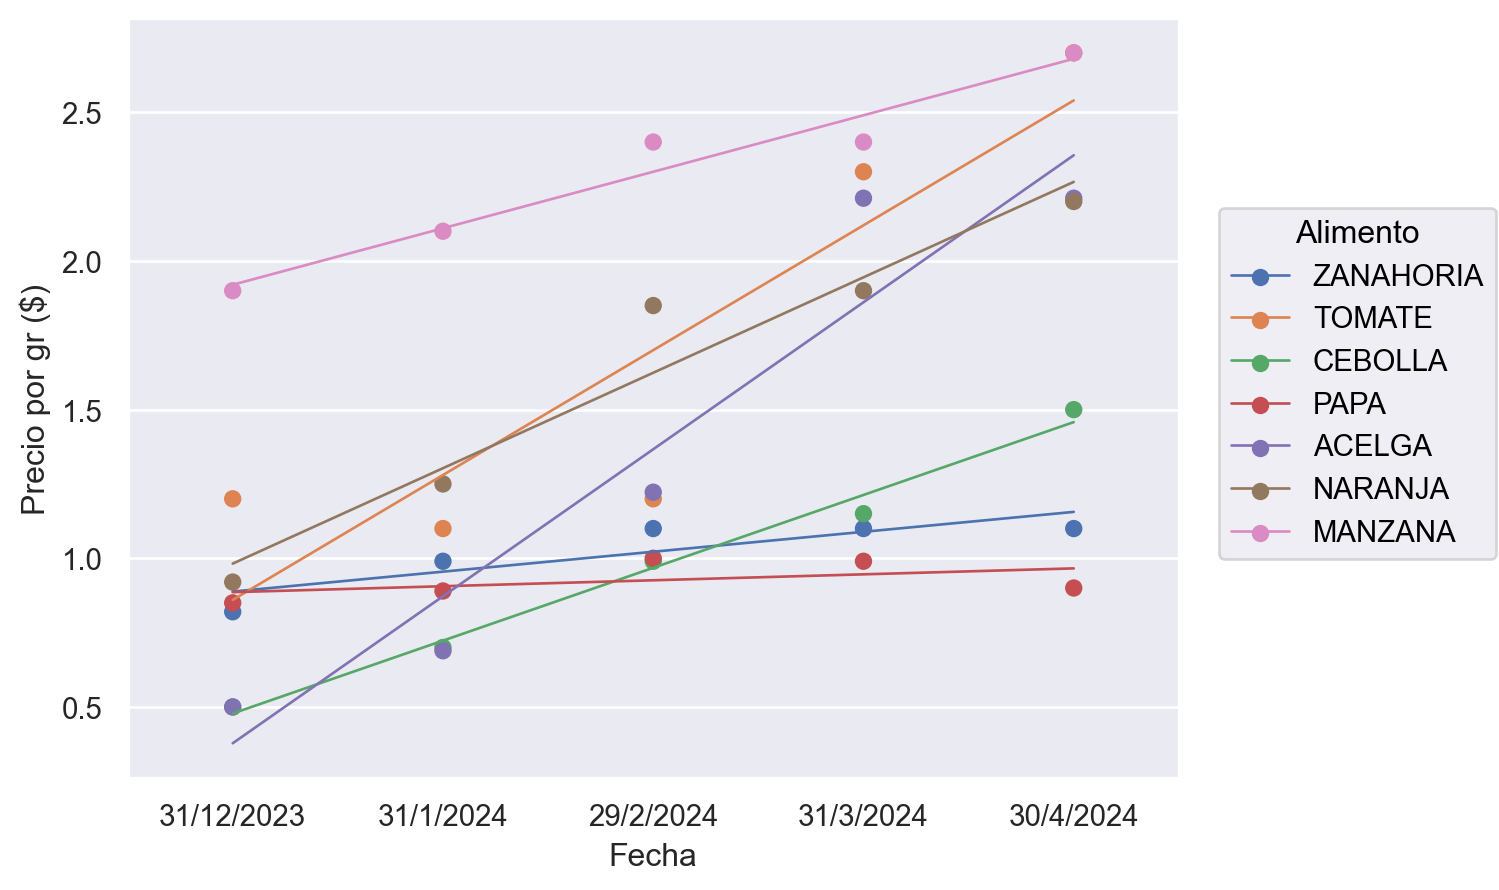

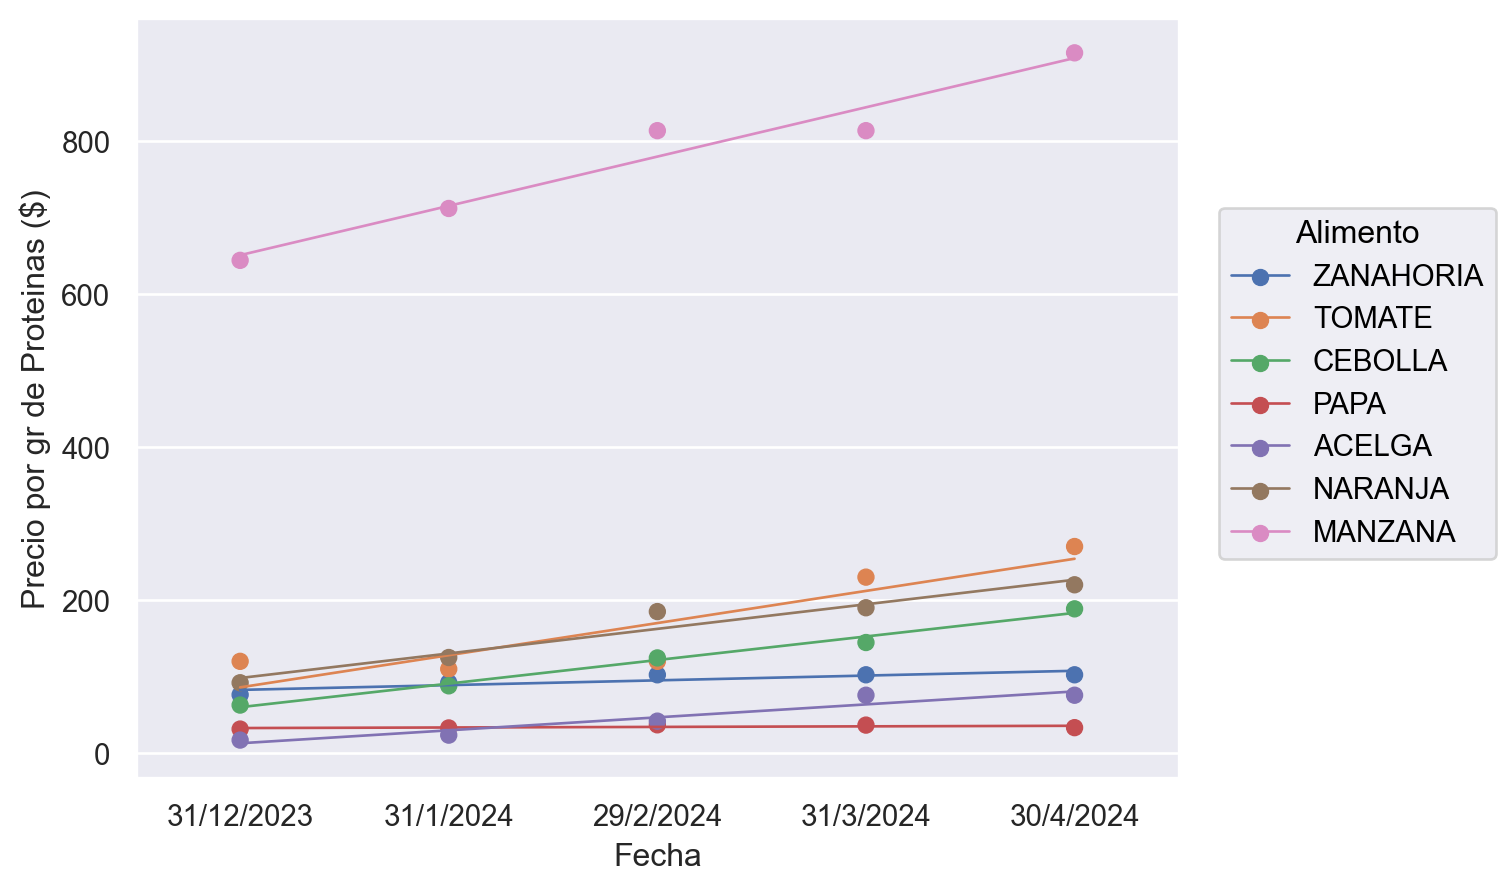

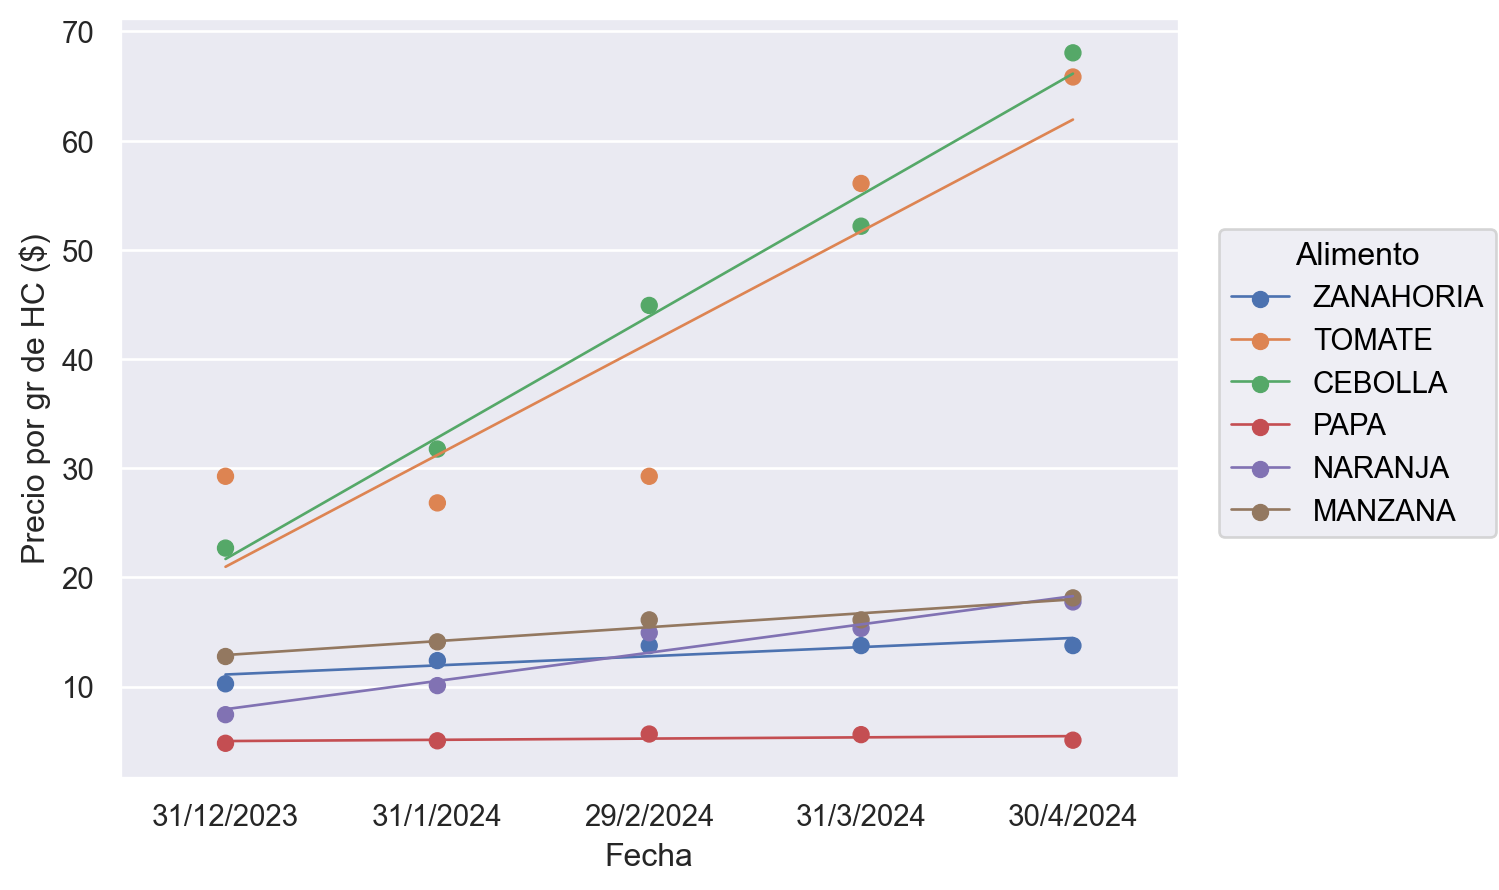

Los Alimentos seleccionados no tienen Grasas (Gr)


In [25]:
graficosNutricionales(VF_nutricional)

In [26]:
almacen_nutricional = consumidores_nutricional[~consumidores_nutricional["Alimento"].isin(["TOMATE", "PAPA", "ACELGA", "ZANAHORIA","MANZANA" ,"NARANJA", "CEBOLLA","CARNE PICADA", "BOLA DE LOMO", "ASADO", "PALETA"])].reset_index(drop=True)

almacen_nutricional.head()

,Alimento,HC (gr),Proteinas (gr),Grasas (gr),Fecha,Precio por gr ($)
0,ACEITE,0.000000,0.000000,1.000000,31/12/2023,1.666667
1,ARROZ,0.791944,0.068889,0.000000,31/12/2023,1.650000
2,AZUCAR,1.000000,0.000000,0.000000,31/12/2023,1.990000
3,FIDEOS,0.725893,0.127679,0.015714,31/12/2023,3.200000
4,HARINA DE TRIGO,0.687111,0.102889,0.026889,31/12/2023,0.950000


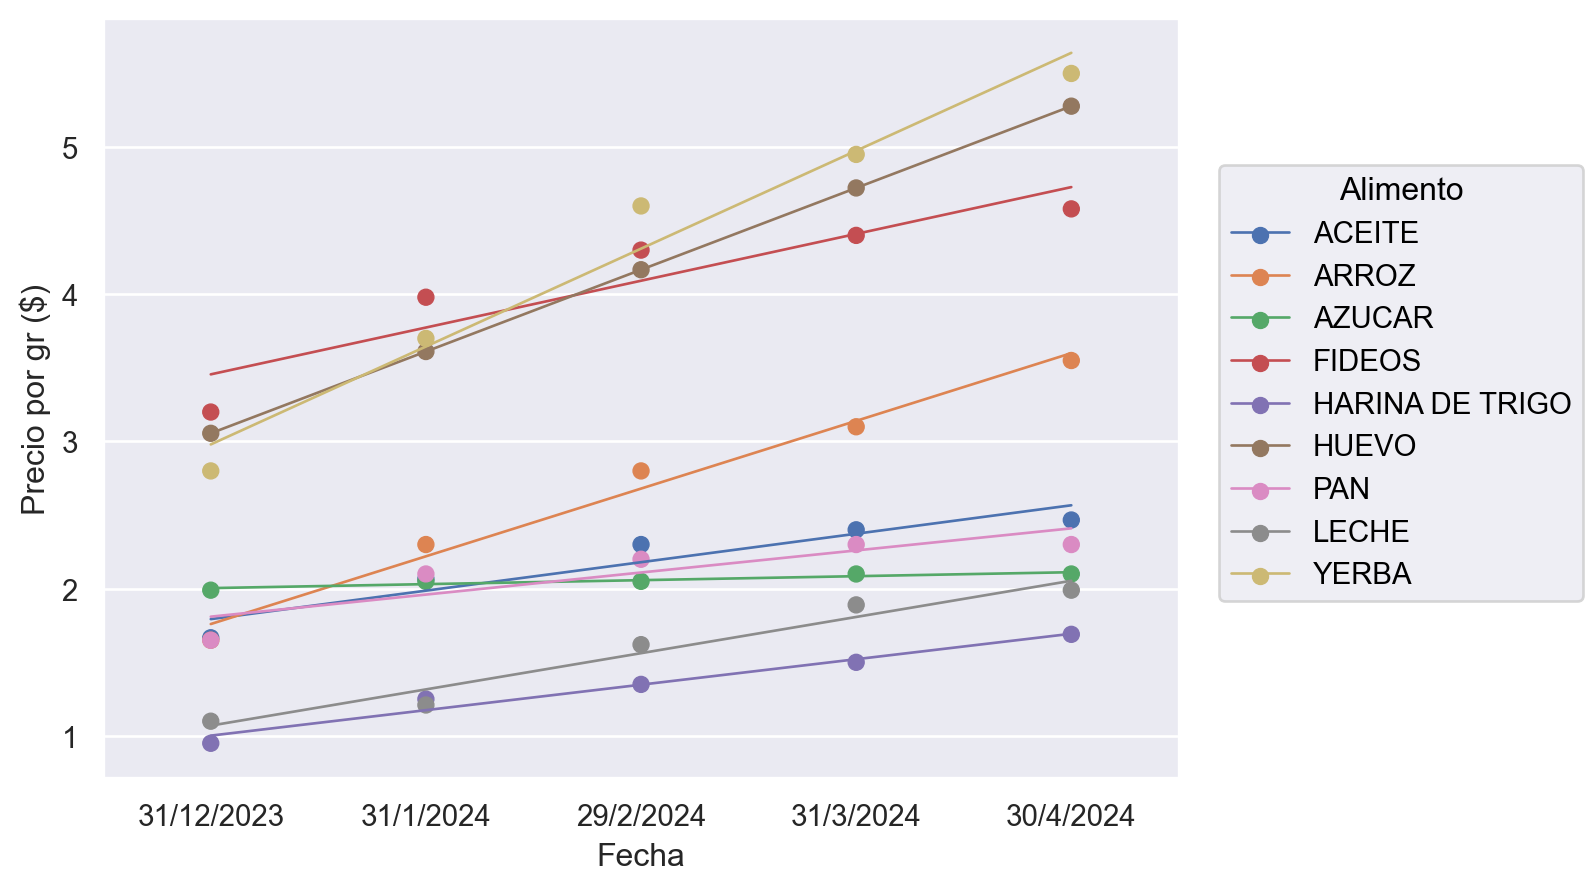

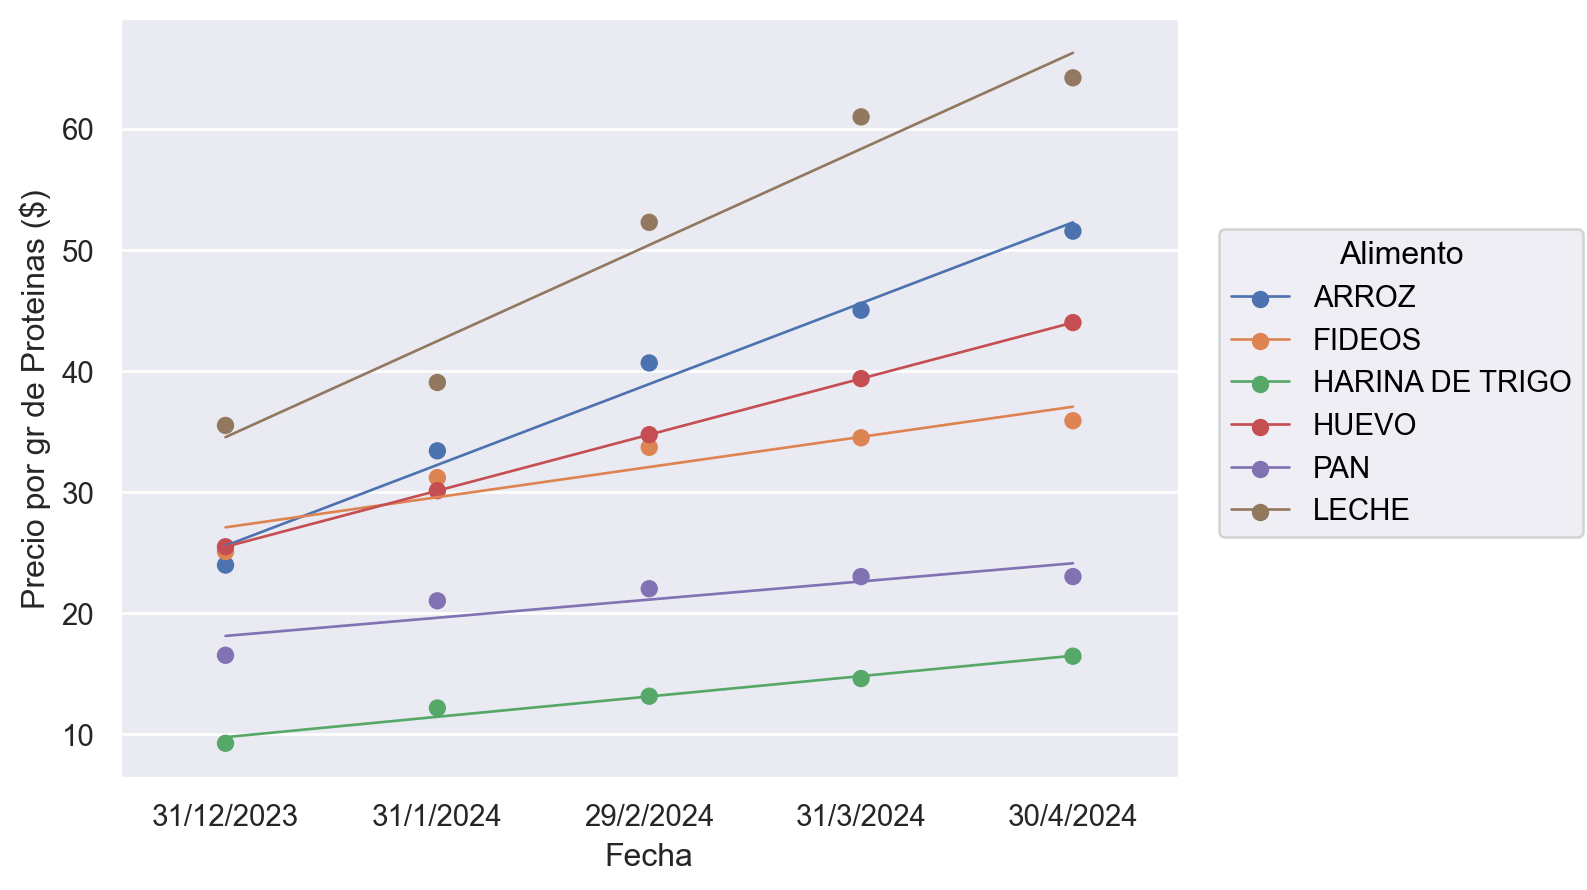

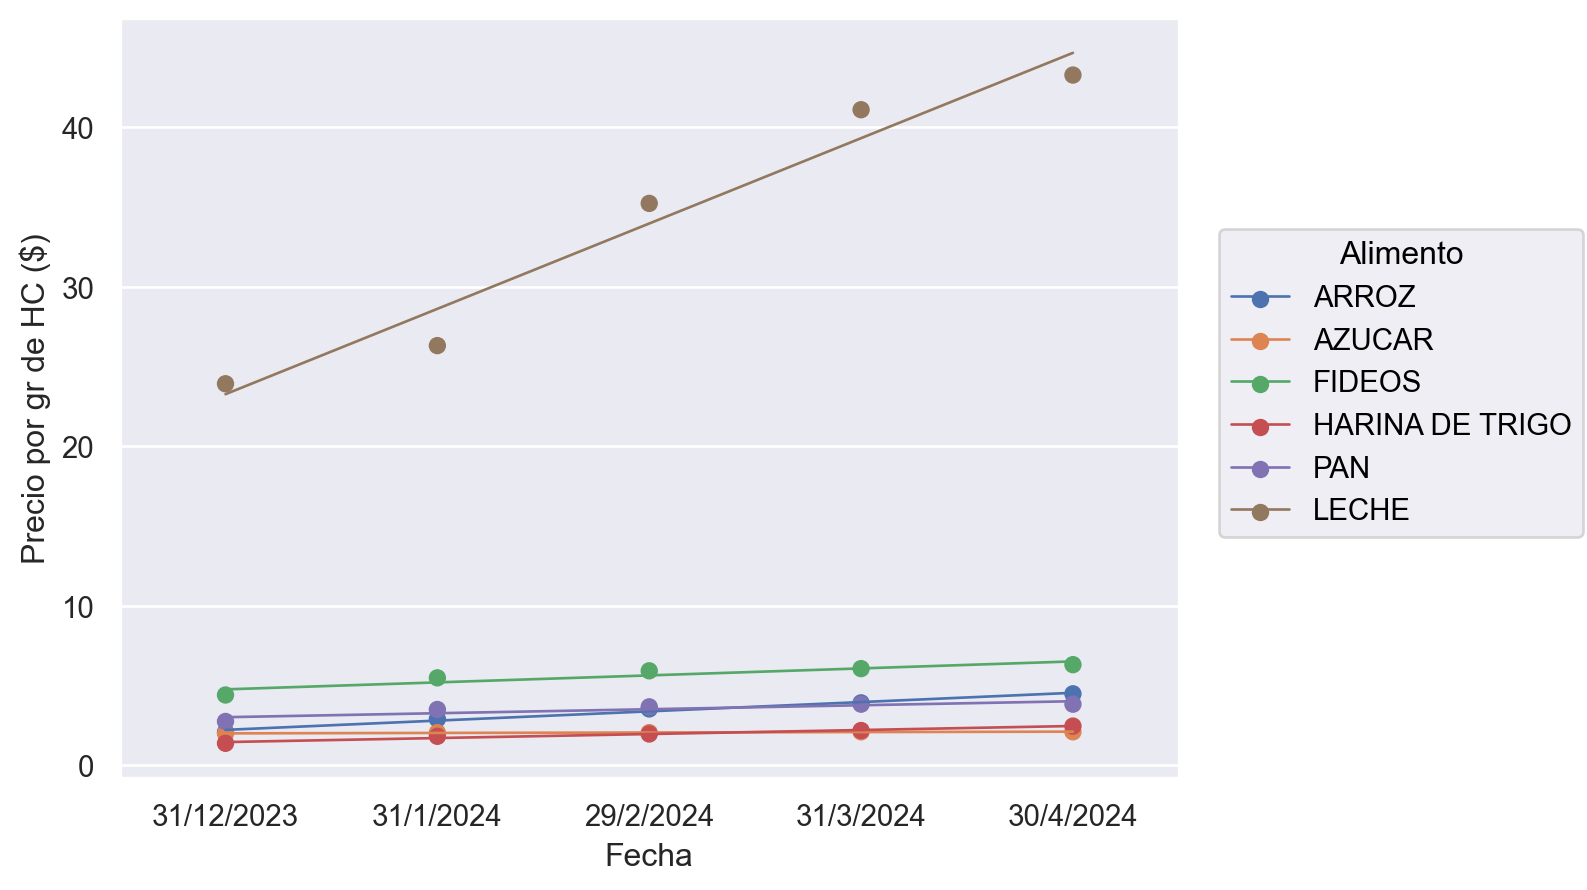

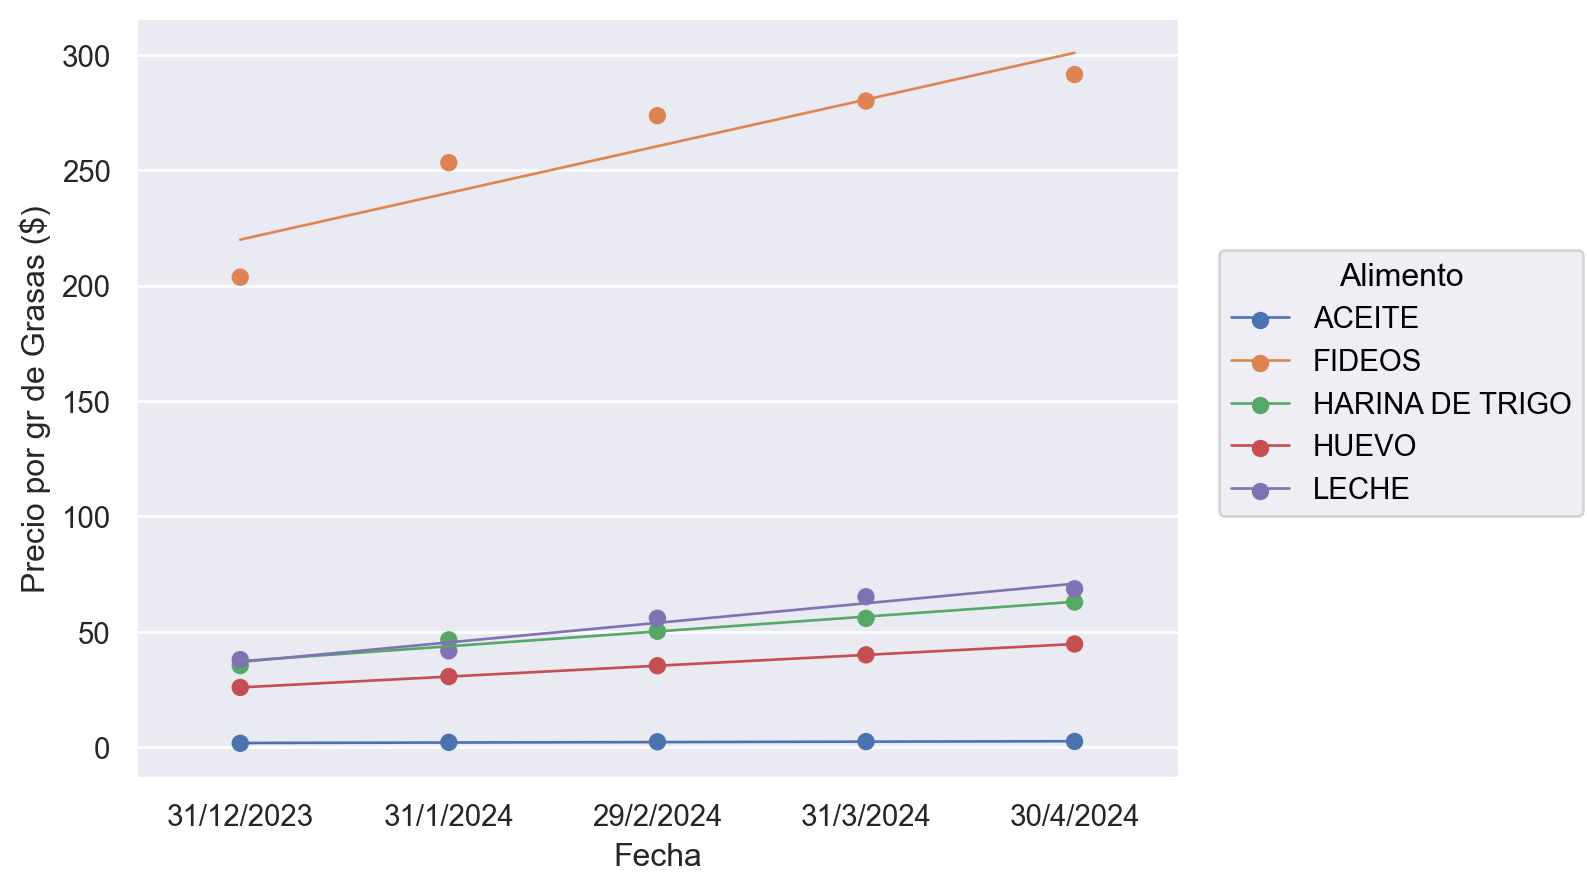

In [27]:
graficosNutricionales(almacen_nutricional)

Ahora si podemos ver como quedaria si solo vemos el aumento en promedio de cada rubro y de todos, si el rubro no tiene del macronutriente buscado, no va a aparecer en el grafico

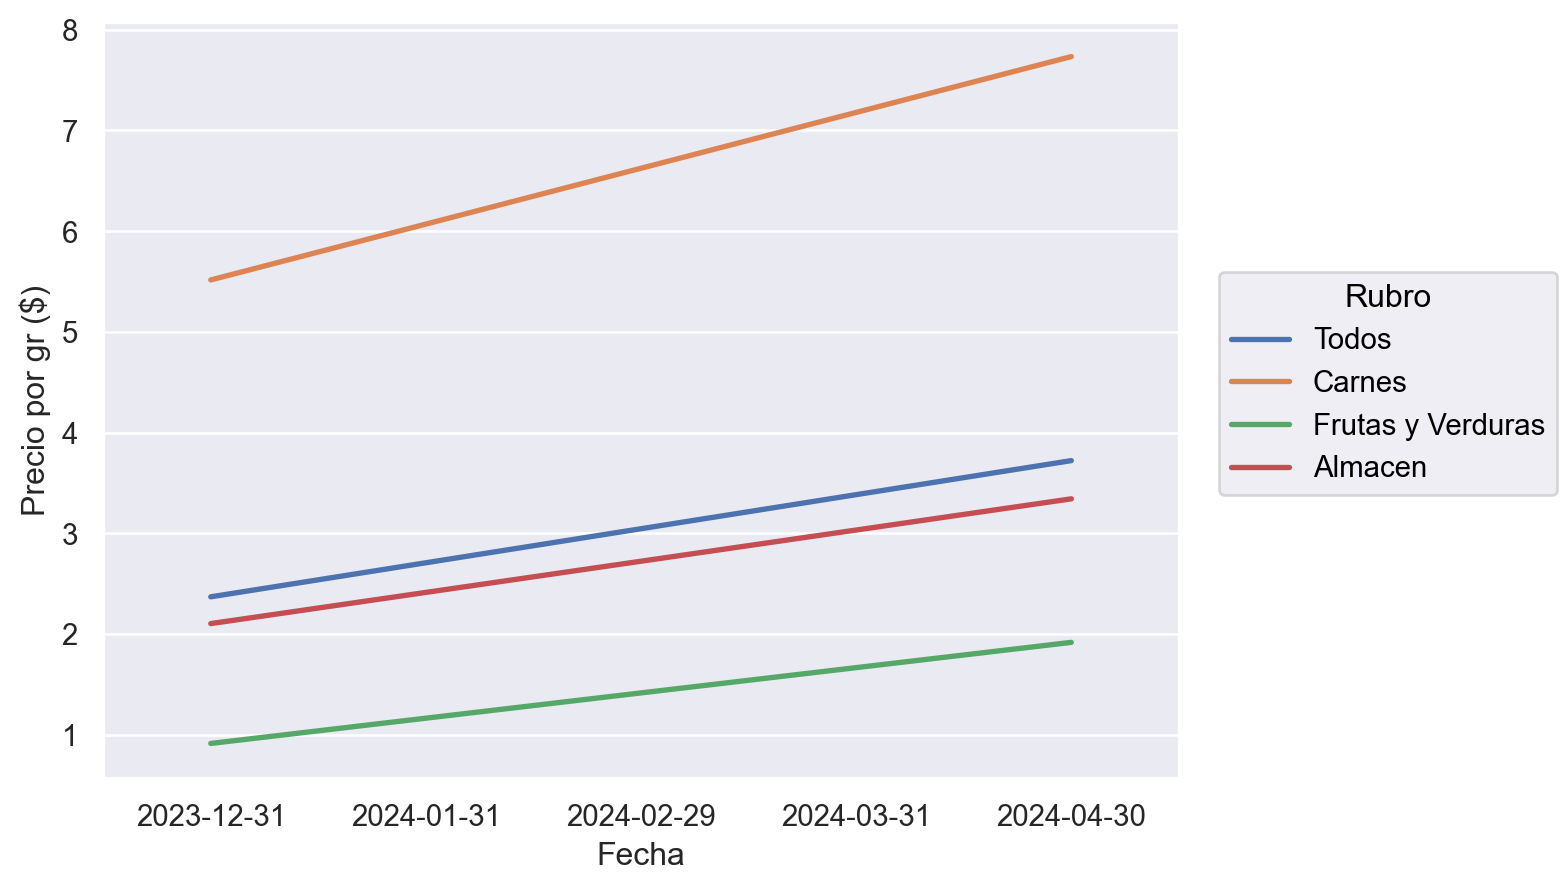

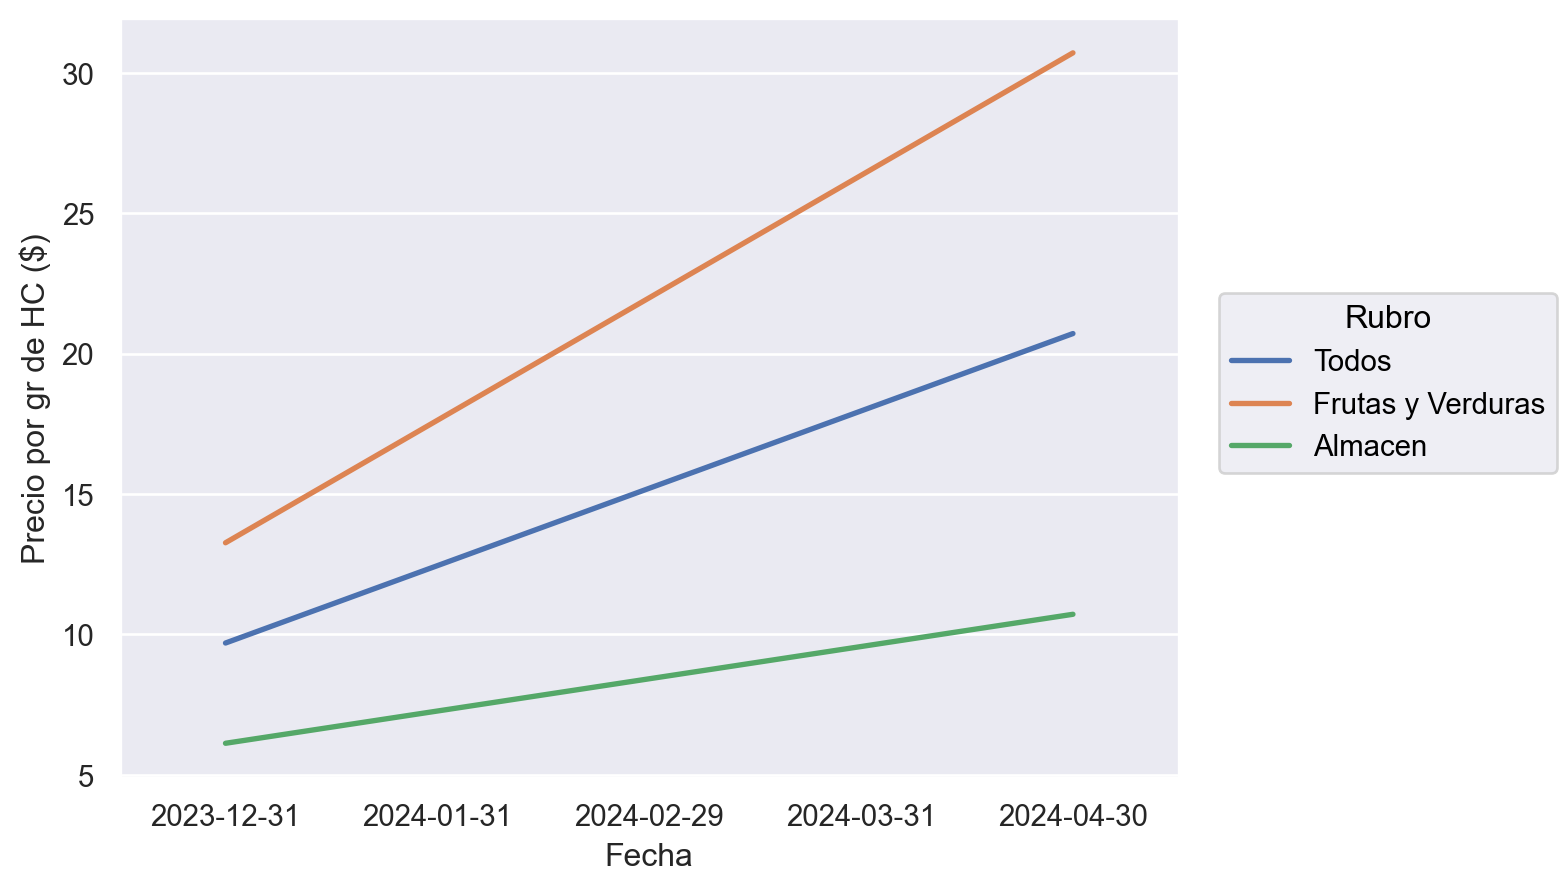

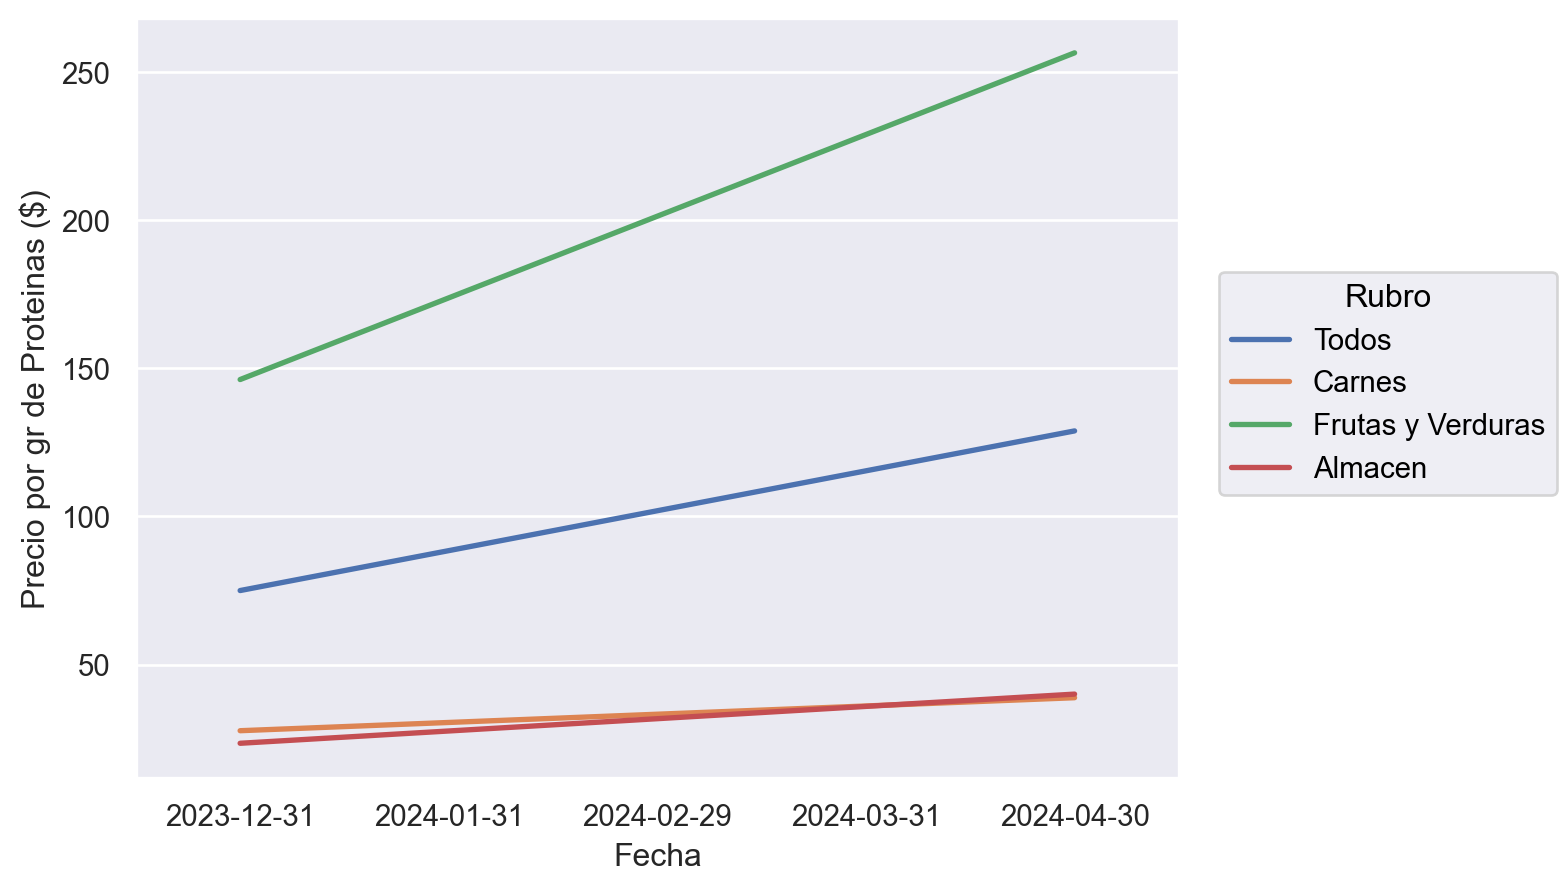

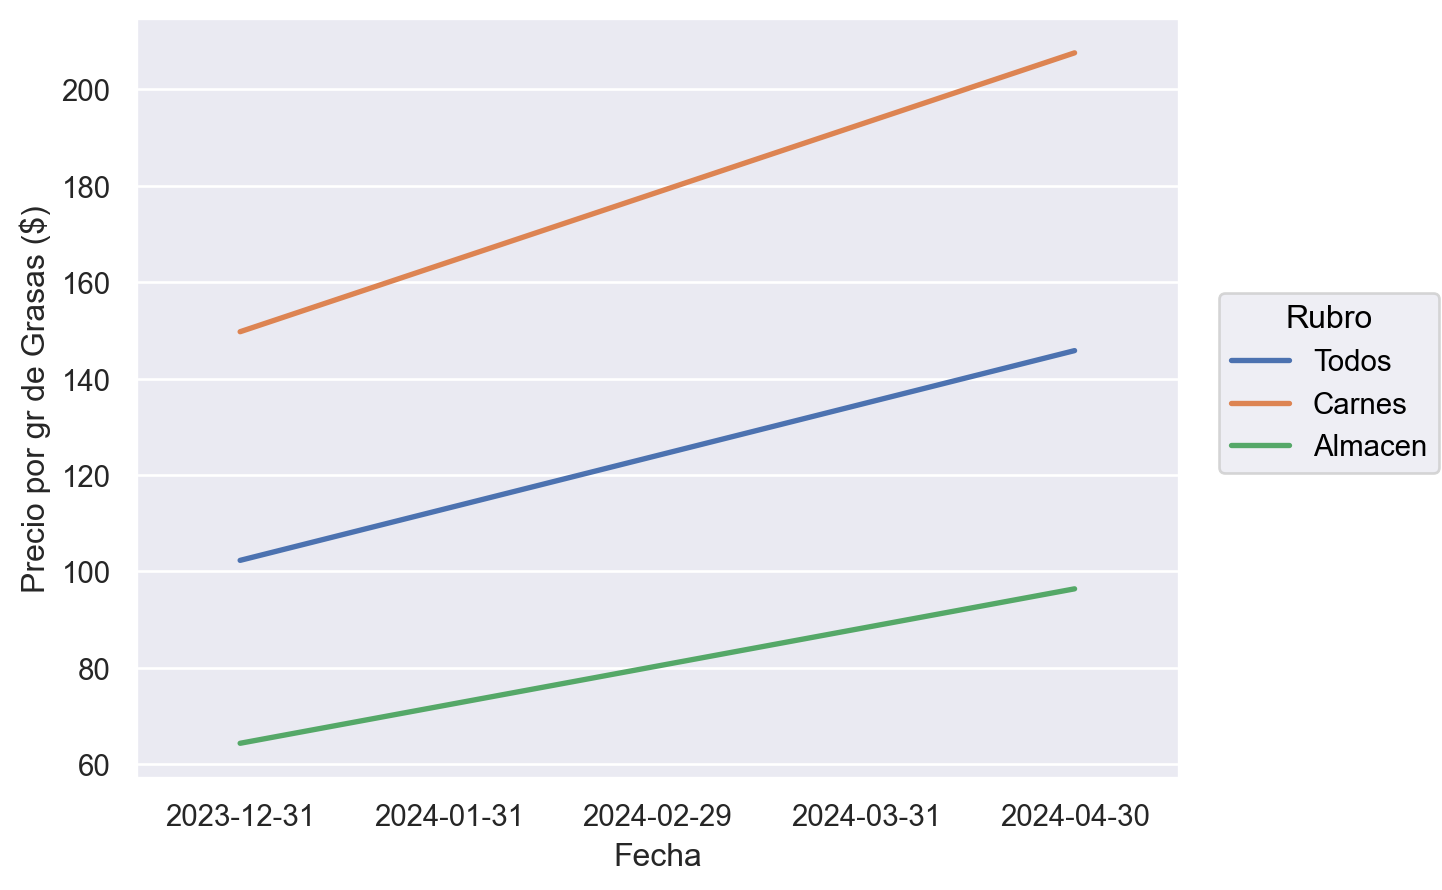

In [28]:
comparacionAumentos(consumidores_nutricional)

Como podemos ver en el primer grafico, en general la carne es el alimento mas caro por gramo, aun asi es uno de los mas baratos si queremos comprar Proteinas pero al mismo tiempo es uno de los mas caros si queremos Grasas

### Consigna 7

### Consigna 8